Q3:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q4:

In [4]:
gdp_df = pd.read_csv('gdp_percapita.csv')

In [5]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


Q5:

In [7]:
gdp_df.shape

(8219, 4)

Q6:

In [9]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Rows: 8219, Columns: 4
"Country or Area" - Object
"Year" - int64
"Value" - float64
"Value Footnotes" - float64

In [11]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [12]:
new_gdp_df = gdp_df.drop(columns = {'Value Footnotes'})
new_gdp_df.head()
new_gdp_df = new_gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
new_gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


Q7: Data for all years: 228 countries with data for all years. 19 Countries don't have data for all years.

In [14]:
total_years = gdp_df['Year'].nunique()
print(total_years)

34


In [15]:
country_counts = new_gdp_df['Country'].value_counts()
all_data_countries = country_counts[country_counts == 34]
print(len(all_data_countries))

228


In [16]:
country_counts = new_gdp_df['Country'].value_counts()
missing_countries = country_counts[country_counts < 34]
print(len(missing_countries))

19


Q8:

In [18]:
#This is creating a new df called gdp_df_2020 that only includes data from 2020.
gdp_df_2020 = new_gdp_df[new_gdp_df['Year'].isin([2020])] 
gdp_df_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


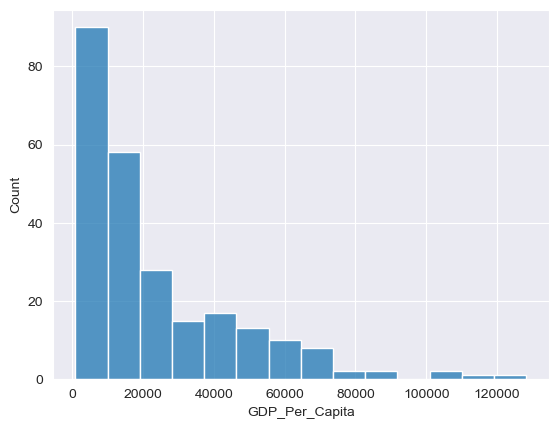

In [19]:
#Histogram allows me to see at a glance that GDP is skewed left -- which means that the majority of nations have a lower GDP per capita.
sns.set_style("darkgrid")
sns.histplot(x = 'GDP_Per_Capita', data=gdp_df_2020);

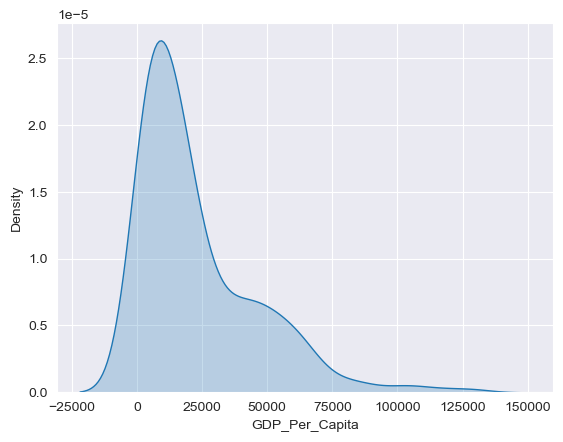

In [20]:
#Density plot gives a more precise look at the distribution. But, shows a lot of the same info as a histogram.
sns.kdeplot(gdp_df_2020.GDP_Per_Capita, fill=True);

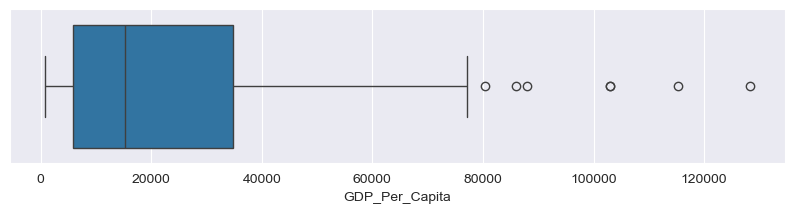

In [21]:
#Boxplot nice to find outliers. ALso, provides a median, and quartiles.
plt.figure(figsize = (10,2))
sns.boxplot(x=gdp_df_2020.GDP_Per_Capita);

<Axes: xlabel='GDP_Per_Capita'>

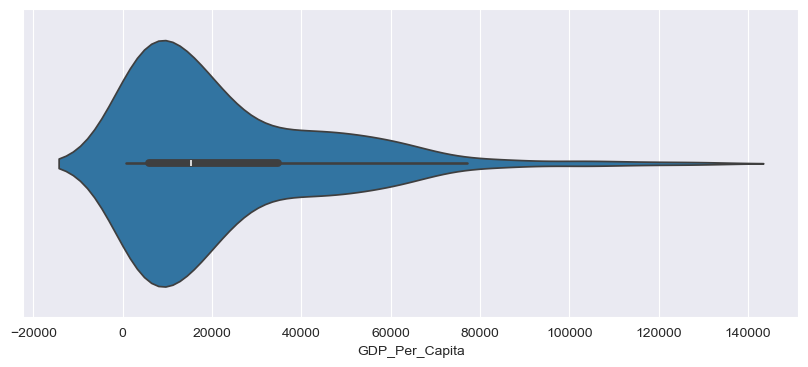

In [22]:
#Violin Plot combines density and boxplot.
plt.figure(figsize = (10,4))
sns.violinplot(x=gdp_df_2020.GDP_Per_Capita)

Q9: median is 15309.23598817024

In [24]:
gdp_df_2020['GDP_Per_Capita'].median()

15309.23598817024

Q10

In [26]:
gdp_decades = new_gdp_df[new_gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


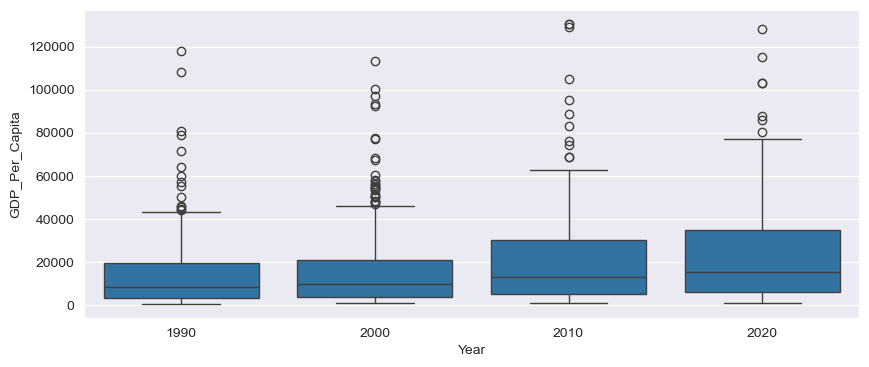

In [27]:
#Boxplot
plt.figure(figsize = (10,4))
sns.boxplot(y='GDP_Per_Capita', x='Year', data=gdp_decades);

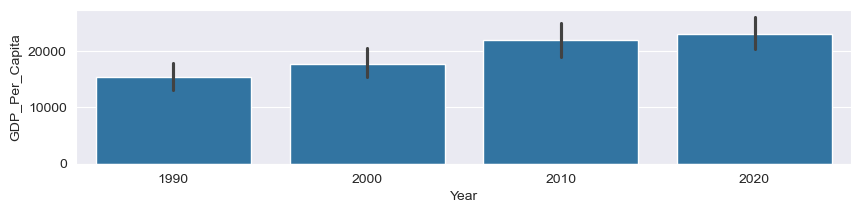

In [28]:
#Barplot
plt.figure(figsize = (10,2))
sns.barplot(y='GDP_Per_Capita', x='Year', data=gdp_decades);

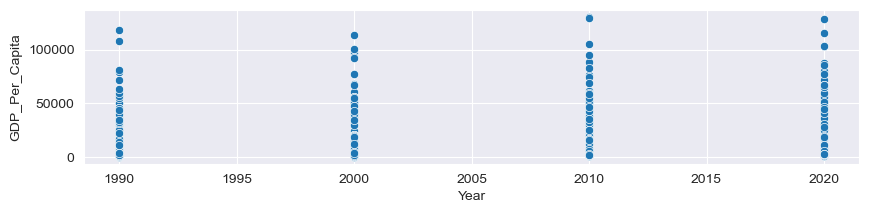

In [29]:
#Scatter Plot
plt.figure(figsize = (10,2))
sns.scatterplot(y='GDP_Per_Capita', x='Year', data=gdp_decades);

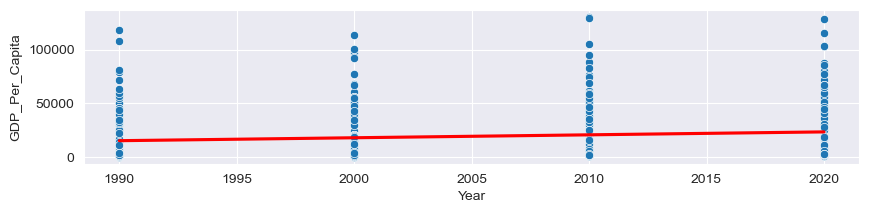

In [30]:
#Scatter Plot w/ trend line
plt.figure(figsize = (10,2))
sns.scatterplot(y='GDP_Per_Capita', x='Year', data=gdp_decades)
sns.regplot(y='GDP_Per_Capita', x='Year', data=gdp_decades, scatter=False, ci=None, color='red')
plt.show();

Q11: UAE & Brunei

In [32]:
#first to 100 is showing the first country(s) that reached 100k in 1990
first_to_100 = gdp_decades[(gdp_decades['Year'] == 1990) & (gdp_decades['GDP_Per_Capita'] > 100000)]
first_to_100

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


Q12: Luxembourg

In [34]:
#Built off of first to 100 and bumped it up to show only 2020 and the max GDP of that year
first_to_100 = gdp_decades[(gdp_decades['Year'] == 2020) & (gdp_decades['GDP_Per_Capita'] > 116000)]
first_to_100

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


Q13:

In [36]:
#just 2020 data
just_2020 = gdp_decades[(gdp_decades['Year'] == 2020)]
just_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [37]:
#just 2020 thats been sorted from least to greatest GDP
just_2020_sorted = just_2020.sort_values('GDP_Per_Capita', ascending=True)
just_2020_sorted

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [38]:
burundi_df = new_gdp_df[new_gdp_df['Country'].isin(['Burundi'])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

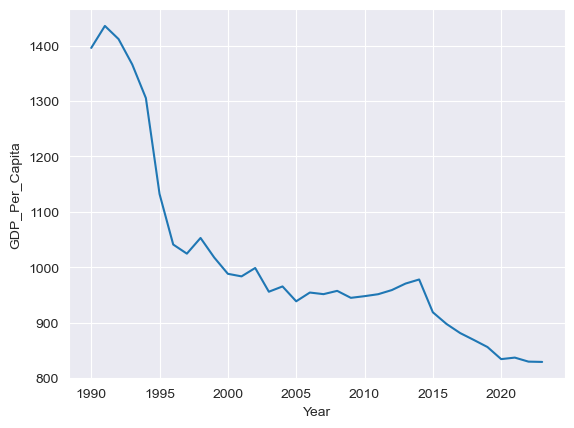

In [39]:
sns.lineplot(data=burundi_df, x='Year', y='GDP_Per_Capita')

Q14:

In [115]:
internet_df = pd.read_csv('internet_use.csv', nrows=6083) 
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


Q15:

In [121]:
clean_net_df = internet_df.drop(columns = {'Value Footnotes'})
clean_net_df = clean_net_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
clean_net_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


Q16:

 Look at the number of observations in this dataset per year. What do you notice?
 1990 had the most observations despite public use of internet not existing until 1991.

In [128]:
clean_net_df['Year'].value_counts()

Year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

Q17: What is the first year to have a non-zero internet users percentage value?

1990

In [153]:
first_non_zero = clean_net_df[clean_net_df['Internet_Users_Pct'] > 0]
first_non_zero.sort_values('Year').head()

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369


Q18:

How does the distribution of internet users percent differ for 2000 and 2014?

36.273% more Internet users in 2014 than 2000

In [160]:
#Creating two new df's to compare percent difference of internet users over time.
net_diff_2000 = clean_net_df[clean_net_df['Year'] == 2000]
net_diff_2014 = clean_net_df[clean_net_df['Year'] == 2014]

In [190]:
net_diff_2014['Internet_Users_Pct'].describe() - net_diff_2000['Internet_Users_Pct'].describe()

count    -6.000000
mean     36.272539
std      15.651462
min       0.990000
25%      16.921240
50%      43.931320
75%      59.723475
max      39.537300
Name: Internet_Users_Pct, dtype: float64

Q19: 10 countries below 5% 

For how many countries was the percentage of internet users below 5% in 2014?

In [194]:
#Shortening net_diff_2014 to net_2014 to make a new calculation on the data frame
net_2014 = net_diff_2014

In [208]:
#Making net_2014 show Countries with less than 5% Internet users
net_2014 = net_2014[net_2014['Internet_Users_Pct'] < 5]
print(len(net_2014))

10


Q20:

In [248]:
#Merging both cleaned csv's
gdp_and_internet_use = new_gdp_df.merge(clean_net_df, on=["Year","Country"], how="outer")
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.0
1,Africa Eastern and Southern,1990,3386.854480,NaN
2,Africa Western and Central,1990,3299.401375,NaN
3,Albania,1990,5327.747458,0.0
4,Algeria,1990,11728.545729,0.0
...,...,...,...,...
9494,Viet Nam,2023,13491.879417,NaN
9495,West Bank and Gaza,2023,5313.097903,NaN
9496,World,2023,20604.121950,NaN
9497,Zambia,2023,3673.484197,NaN


Q21: Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [254]:
#Creating a new df that takes the merged CSV's and makes them only output data for 2014
full_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [262]:
#Sorting the df from above to show the top 3 countries that have the highest percentage of Internet users
full_2014 = full_2014.sort_values("Internet_Users_Pct", ascending=False)
full_2014.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6853,Iceland,2014,57981.199448,98.158
6822,Falkland (Malvinas) Islands,2014,NaN,97.600
6760,Bermuda,2014,92298.387811,96.800


In [264]:
#Creating a new df with all data for only the top 3 countries for internet use in 2014 to use for Q21's graph
top_3_internet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda'])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
26,Bermuda,1990,79109.890650,0.000000
89,Falkland (Malvinas) Islands,1990,NaN,0.000000
124,Iceland,1990,40081.958967,0.000000
318,Bermuda,1991,75754.494259,NaN
393,Iceland,1991,39531.470666,0.505129
...,...,...,...,...
8815,Iceland,2021,61685.835611,99.687000
9004,Bermuda,2022,98057.447098,NaN
9092,Iceland,2022,65563.920870,99.856500
9280,Bermuda,2023,98041.688721,NaN


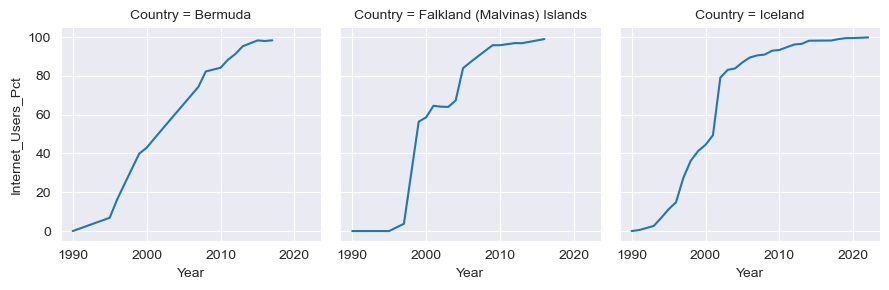

In [278]:
#FacetGrid using a lineplot to show internet users growth over time.
g = sns.FacetGrid(top_3_internet, col='Country', )
g.map_dataframe(sns.lineplot, x='Year', y='Internet_Users_Pct');

Q22:

In [281]:
#creating a new df with the same df I made for Q21
gdp_and_internet_use_2014 = full_2014

Q23:

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

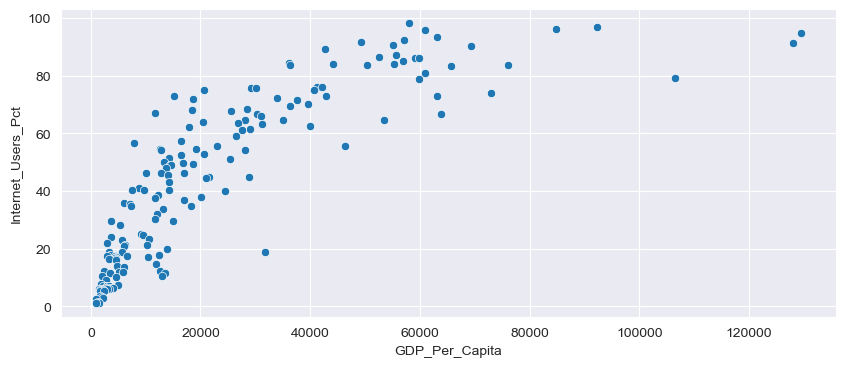

In [292]:
#Scatter Plot 
plt.figure(figsize = (10,4))
sns.scatterplot(y='Internet_Users_Pct', x='GDP_Per_Capita', data=gdp_and_internet_use_2014)